In [1]:
pwd

'/home/jose/Desktop/GitHub/OneDimensional_DMA_inversion/Python/Examples'

In [2]:
from linker import *
%matplotlib notebook

## Scan DMA measurements:

In [3]:
#import pandas as pd
cols = ["Dp","N","R","Z","Zs","V2"]
test_case = pd.read_csv('Test_inversion/convolution_case.txt', sep = "\t", names = cols)
test_case.sort_values(by="V2", inplace=True, ignore_index=True)
test_case.head()

,Dp,N,R,Z,Zs,V2
0,10.037748,2.863386e-07,1.623116e-07,0.000002,0.000002,10.162653
1,10.113678,3.151613e-07,1.851794e-07,0.000002,0.000002,10.314939
2,10.190189,3.469569e-07,2.108357e-07,0.000002,0.000002,10.469506
3,10.267288,3.820494e-07,2.395929e-07,0.000002,0.000002,10.626390
4,10.344978,4.208010e-07,2.718095e-07,0.000002,0.000002,10.785625


In [4]:
Dp0 = test_case.Dp.values * 1e-09
Voltage0 = test_case.V2.values
R0 = test_case.R.values
N0 = test_case.N.values

dNdLogD0 = np.zeros_like(N0)
dNdLogD0[0] = N0[0]/np.log10(Dp0[1]/Dp0[0])
for i in range(1,len(N0)):
    dNdLogD0[i] = N0[i]/np.log10(Dp0[i]/Dp0[i-1])

## Setup the DMA

In [5]:
DMA_props = {
    "model":         "long",
    "flow_aerosol":  1,
    "flow_sheath":   5,
    "Voltage":       100,
    "L_eff":         13,
    "Pressure":      101000,
    "Temperature":   300,
    "Charge_limit":  6} 

# Setup DMA
dma0 = DMA_tools.DMA(DMA_props)

## Deconvolute signal

In [6]:
dNdLogD,dNdLogD_r,R_conv = DMA_tools.Deconvolute_singleDMA(dma0,test_case)

In [7]:
A0 = dma0.Convolution_matrix(Dp0, Voltage0)
R_conv1 = dma0.Convolution(A0, test_case.N.values)

In [8]:
N_alpha = dma0.Deconvolution(R0, A0, 1e-03)
R_conv2 = dma0.Convolution(A0, N_alpha)

## Plot results

<IPython.core.display.Javascript object>


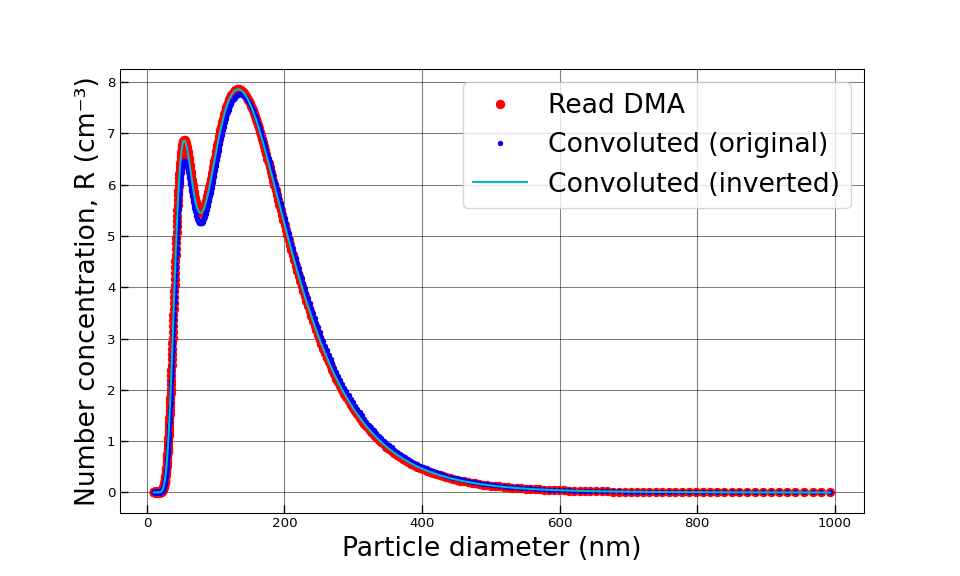

<IPython.core.display.Javascript object>


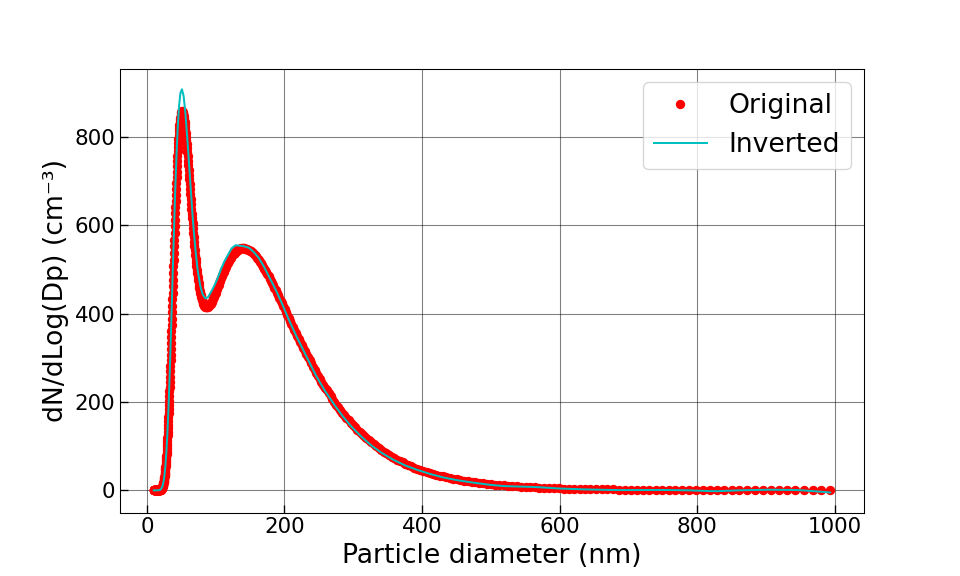

In [9]:
fig, ax = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Dp0 * 1e+09, R0,"o r", label="Read DMA")
plt.plot(Dp0 * 1e+09, R_conv1,".b", label="Convoluted (original)")
plt.plot(Dp0 * 1e+09, R_conv2,"-c", label="Convoluted (inverted)")
plt.ylabel("Number concentration, R (cm⁻³)", fontsize=20)
plt.xlabel("Particle diameter (nm)", fontsize=20)
ax.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.tick_params(axis='x', which='minor', direction='in')#,bottom=False)
ax.tick_params(axis='y', which='minor', direction='in')#,bottom=False)
plt.rc('xtick', labelsize=16); plt.rc('ytick', labelsize=16)
plt.legend(fontsize=20); plt.grid(); plt.show()
plt.savefig('Tutorial_v01_DMA_read.png');

fig, ax = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Dp0 * 1e+09, dNdLogD0,"o r", label="Original")
plt.plot(Dp0 * 1e+09, dNdLogD,"-c", label="Inverted")
plt.ylabel("dN/dLog(Dp) (cm⁻³)", fontsize=20)
plt.xlabel("Particle diameter (nm)", fontsize=20)
ax.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.tick_params(axis='x', which='minor', direction='in')#,bottom=False)
ax.tick_params(axis='y', which='minor', direction='in')#,bottom=False)
plt.rc('xtick', labelsize=16); plt.rc('ytick', labelsize=16)
plt.legend(fontsize=20); plt.grid(); plt.show()
plt.savefig('Tutorial_v01_Deconvoluted.png');

## Adding noise to data

In [10]:
#import pandas as pd
cols = ["Dp","N","R","Z","Zs","V2"]
test_case = pd.read_csv('Test_inversion/convolution_case.txt', sep = "\t", names = cols)
test_case.sort_values(by="V2", inplace=True, ignore_index=True)
test_case.head()

,Dp,N,R,Z,Zs,V2
0,10.037748,2.863386e-07,1.623116e-07,0.000002,0.000002,10.162653
1,10.113678,3.151613e-07,1.851794e-07,0.000002,0.000002,10.314939
2,10.190189,3.469569e-07,2.108357e-07,0.000002,0.000002,10.469506
3,10.267288,3.820494e-07,2.395929e-07,0.000002,0.000002,10.626390
4,10.344978,4.208010e-07,2.718095e-07,0.000002,0.000002,10.785625


In [11]:
percent_noise = 10
noise = np.random.normal(1,percent_noise/100,len(R0))

In [12]:
Dp0 = test_case.Dp.values * 1e-09
Voltage0 = test_case.V2.values
R0 = test_case.R.values
R0 = R0* noise

In [13]:
test_case.R = R0

In [14]:
dNdLogD,dNdLogD_r,R_conv = DMA_tools.Deconvolute_singleDMA(dma0,test_case)

<IPython.core.display.Javascript object>


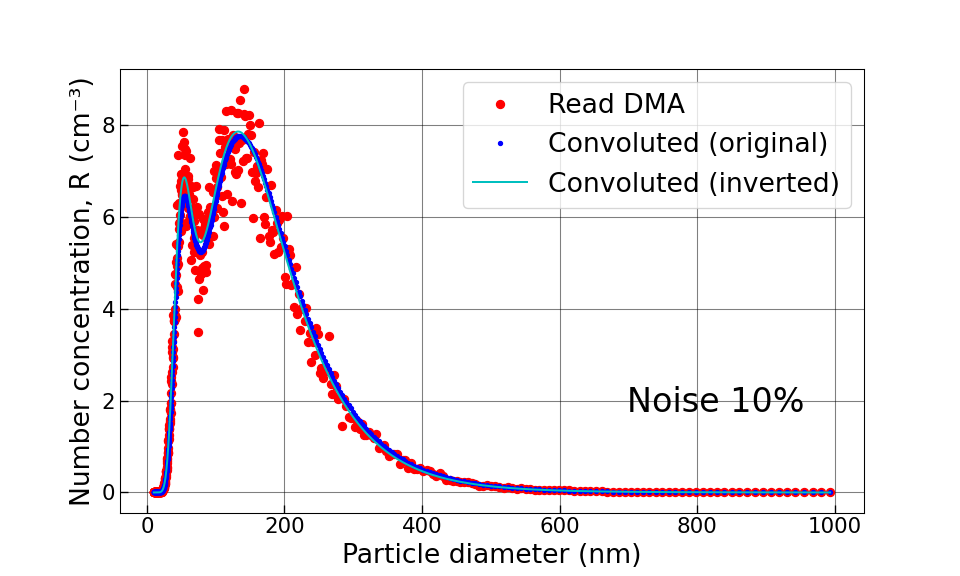

<IPython.core.display.Javascript object>


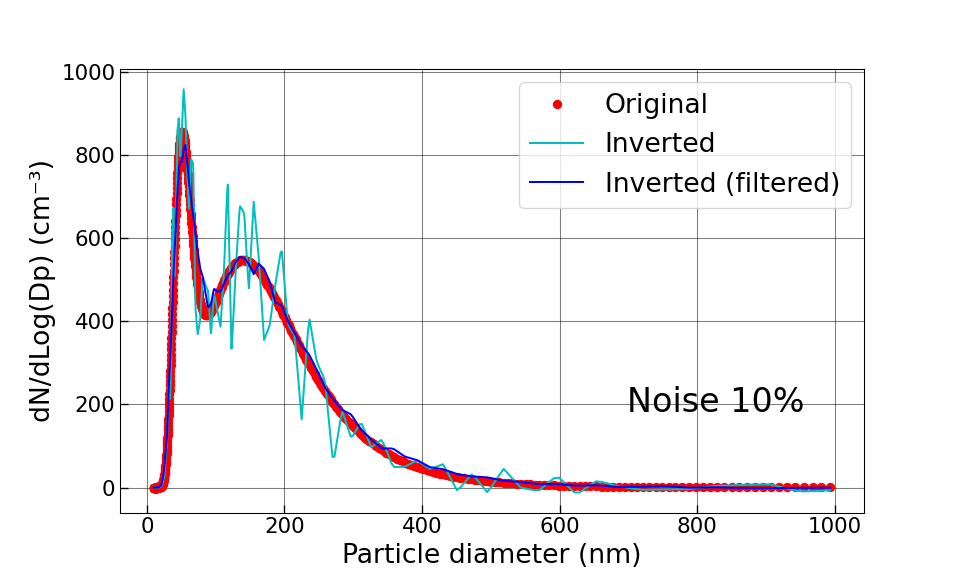

In [15]:
fig, ax = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Dp0 * 1e+09, R0,"o r", label="Read DMA")
plt.plot(Dp0 * 1e+09, R_conv1,".b", label="Convoluted (original)")
plt.plot(Dp0 * 1e+09, R_conv2,"-c", label="Convoluted (inverted)")
plt.ylabel("Number concentration, R (cm⁻³)", fontsize=20)
plt.xlabel("Particle diameter (nm)", fontsize=20)
ax.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.tick_params(axis='x', which='minor', direction='in')#,bottom=False)
ax.tick_params(axis='y', which='minor', direction='in')#,bottom=False)
plt.rc('xtick', labelsize=16); plt.rc('ytick', labelsize=16)
x_min = np.min(Dp0 * 1e+09); x_max = np.max(Dp0 * 1e+09)
y_min = np.min(R0); y_max = np.max(R0)
plt.text(0.7*(x_max-x_min)+x_min,
         0.2*(y_max-y_min)+y_min,
         "Noise "+str(percent_noise)+"%",
         color="black",
         fontsize=25)
plt.legend(fontsize=20); plt.grid(); plt.show()
plt.savefig('Tutorial_v01_DMA_read_noise'+str(percent_noise)+'perc.png');

fig, ax = plt.subplots(num=None, figsize=(10, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(Dp0 * 1e+09, dNdLogD0,"o r", label="Original")
plt.plot(Dp0 * 1e+09, dNdLogD,"-c", label="Inverted")
plt.plot(Dp0 * 1e+09, dNdLogD_r,"-b", label="Inverted (filtered)")
plt.ylabel("dN/dLog(Dp) (cm⁻³)", fontsize=20)
plt.xlabel("Particle diameter (nm)", fontsize=20)
ax.tick_params(direction='in', length=6, width=1, colors='k',
               grid_color='k', grid_alpha=0.5)
ax.tick_params(axis='x', which='minor', direction='in')#,bottom=False)
ax.tick_params(axis='y', which='minor', direction='in')#,bottom=False)
plt.rc('xtick', labelsize=16); plt.rc('ytick', labelsize=16)
x_min = np.min(Dp0 * 1e+09); x_max = np.max(Dp0 * 1e+09)
y_min = np.min(dNdLogD); y_max = np.max(dNdLogD)
plt.text(0.7*(x_max-x_min)+x_min,
         0.2*(y_max-y_min)+y_min,
         "Noise "+str(percent_noise)+"%",
         color="black",
         fontsize=25)
plt.legend(fontsize=20); plt.grid(); plt.show()
plt.savefig('Tutorial_v01_Deconvoluted_noise'+str(percent_noise)+'perc.png');